## Introductory Overview

One of the metrics we chose to analyze is the arrest records pertaining to each neighborhood. While this metric could potentially open the door to more nuanced studies about topics such as the intentions of police officers and whether certain crimes justify locking up the perpetrator, we kept it simple and deemed the neighborhoods with the least arrests to be best. Despite the nuances to this study that we did not dive into, this metric can still be used in this way to deem which neighborhood is best because it tells us which neighborhoods generally are home to the most or least arrests respectively, as well as which neighborhoods police officers deem the most important to routinely survey.

* NOTE: Make sure to upload the file 'police_arrest_data.csv' to the same directory as this notebook prior to running.

In [7]:
#connect your data folder and read data
import pandas as pd
df = pd.read_csv('police_arrest_data.csv')

In [4]:
#take a peak of the data
df
# '/content/drive/MyDrive/big_ideas_data/zipcode_neighborhood_mapping_no_duplicates.csv'

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66478,88274,2064627,23175998,40.0,M,W,2023-11-05T16:19:00,"1400 Block Sheffield ST Pittsburgh, PA 15233",3304 Criminal Mischief. / 3502 Burglary. / 392...,"1400 Block Sheffield ST Pittsburgh, PA 15233",Manchester,1,2107.0,6.0,1.0,-80.026065,40.453105
66479,88275,2064628,23179042,44.0,F,B,2023-11-11T03:41:00,"900 Block Brookline BL Pittsburgh, PA 15226",5104 Resisting Arrest or Other Law Enforcement...,"900 Block Brookline BL Pittsburgh, PA 15226",Brookline,6,1918.0,4.0,5.0,-80.019190,40.392879
66480,88276,2064629,23140205,18.0,M,B,2023-11-04T00:49:00,"6600 Block Frankstown AV Pittsburgh, PA 15206",2702 Aggravated Assault. / 2705 Recklessy Enda...,"N Murtland ST Pittsburgh, PA 15208",Homewood North,3,1302.0,NaN,NaN,NaN,NaN
66481,88277,2064630,23146375,32.0,M,B,2023-09-14T23:44:00,"1000 Block Airport BL Pittsburgh, PA 15231",9501 Bench Warrant,"1000 Block Airport BL Pittsburgh, PA 15231",Outside City,OSC,5599.0,NaN,NaN,-80.255272,40.496059


In [5]:
# Aggregate data by 'INCIDENTNEIGHBORHOOD'
neighborhood_arrests = df['INCIDENTNEIGHBORHOOD'].value_counts().sort_values()
top_neighborhoods = neighborhood_arrests.head(10)

# Print the neighborhoods with the least arrests
print("Neighborhoods with the least arrests:")
print(neighborhood_arrests.head())

# Extract the zipcode from 'INCIDENTLOCATION'
def extract_zip_code(location):
    # This is a simple extractor that might need to be adjusted based on the data format
    if isinstance(location, str) and location[-5:].isdigit():
        return location[-5:]
    return None

# Apply this function to the relevant column
df['ZIPCODE'] = df['INCIDENTLOCATION'].apply(extract_zip_code)

# Aggregate data by 'ZIPCODE'
zip_code_arrests = df['ZIPCODE'].value_counts().sort_values()
top_zip_codes = zip_code_arrests.head(10)

# Print the zip codes with the least arrests
print("Zip codes with the least arrests:")
print(zip_code_arrests.head())

Neighborhoods with the least arrests:
Mt. Oliver Neighborhood     2
Troy Hill-Herrs Island      6
Mt. Oliver Boro            18
Central Northside          23
Ridgemont                  37
Name: INCIDENTNEIGHBORHOOD, dtype: int64
Zip codes with the least arrests:
48501    1
15282    1
15260    1
15317    1
44305    1
Name: ZIPCODE, dtype: int64


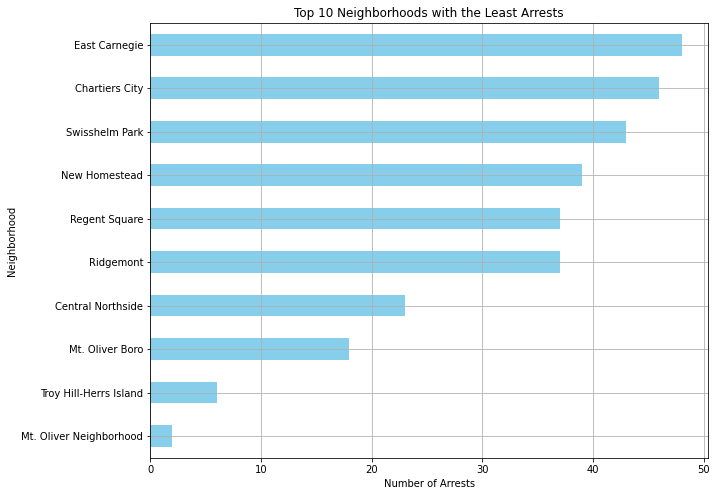

In [6]:
import matplotlib.pyplot as plt

# Plotting the neighborhoods
plt.figure(figsize=(10, 8))
top_neighborhoods.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Arrests')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods with the Least Arrests')
plt.grid(True)
plt.show()

## Results and Conclusion

Based on the data shown above, the neighborhood with the least arrests made during the time period across which this data spans is the neighborhood of Mt. Oliver. However, after totaling this number up with the total arrests in the entire Mt. Oliver borough, it comes in second place to Troy Hill. While these areas have somewhat small populations compared to some of the neighborhoods on the other end of the spectrum, they do have considerably less arrests than other neighborhoods of similar or even smaller population sizes. 

Despite the fact that many media sources presenting this data would likely want you to conclude that the neighborhoods with the lowest numbers of arrests are inherently the safest, this is not true, failing to account for the nuances that go into a study such as this and the possibility of crimes being committed that never end in the criminals being arrested. However, as established in the introduction, this study can still be viewed at the surface level to declare which neighborhoods are generally the least likely to contain criminals. Furthermore, it is worth noting that Mt. Oliver has both a significantly lower average household income than other neighborhoods in Pittsburgh and the nation at large and a relatively large proportion of minorities (source: https://datausa.io/profile/geo/mount-oliver-pa), which are both things that cause corrupt or discriminatory police officers to be more likely to make undeserved arrests. In conclusion, we can declare that Mt. Oliver and Troy Hill are some of the best neighborhoods in Pittsburgh based on arrest records gathered from each neighborhood.